In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',category=integrate.IntegrationWarning)

## 1차원 연속형 확률변수

연속형 확률변수는 확률변수가 취할 수 있는 값이 연속적인 확률변수이다

연속형 확률변수는 정확히 어떤 값을 나타낼 수 없으므로(물을 떴을 때 정확히 500.0000...g일 확률은 0) 특정한 범위에 들어가는 확률을 구한다

### 1차원 연속형 확률변수의 정의

#### 확률밀도함수

이산형 확률변수와는 다르게 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며, 확률은 **확률밀도함수(probability density function,PDF)** 또는 간단히 **밀도함수** 라고 부르는 $f(x)$ 에 의해 정의된다

밀도함수는 확률함수에 가깝지만

$$f(x) = P(X=x)$$

는 되지 않는다는 점에 주의하자(위의 식은 이산형 확률변수 식이다)

밀도함수에 의한 확률은 확률변수 X가 $x_{0}\geq X \geq x_{1}$ 의 구간에 들어갈 확률 $P(x_{0} \geq X \geq x_{1}$로 정의되고, 다음과 같이 적분으로 계산한다

$$P(x_{0} \geq X \geq x_{1} = \int_{x_{0}}^{x_{0}}f(x)dx$$

이 적분은 밀도함수 $f(x)$와 x축, 그리고 두 직선 $x=x_{0},x=x_{1}$으로 둘러싸인 영역의 면적으로 해석할 수 있다.

불공정한 룰렛을 예로들어 파이썬으로 구현해보자

In [3]:
x_range = np.array([0,1])

밀도함수는 다음과 같다

$$f(x) = 2x(0 \geq x \geq 1)$$

$$f(x) = 0 (otherwise)$$

In [4]:
def f(x) : 
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

이 x_range와 f의 세트가 확률분포이다.

따라서 X는 x_range와 f를 요소로 하는 리스트로 구현한다

In [5]:
X = [x_range, f]

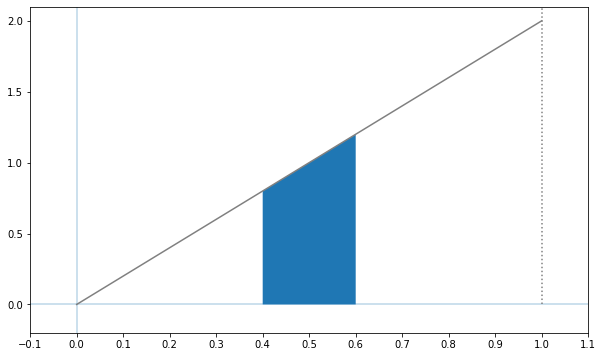

In [6]:
# 0.4~0.6의 범위의 확률을 구한다

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs,[f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0,-0.2,2.2,alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6까지 x좌표를 준비
xs = np.linspace(0.4,0.6,100)
# xs읩 범위로 f(x)와 x축으로 둘러싸인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2,1.3,0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,2.1)

plt.show()